# Studies of data reuse: EEG and Morris water maze data for Cyclin D2 KO mice and wildtype mice (v1)


In this notebook we will look more closely at the EBRAINS dataset "[EEG and Morris water maze data for Cyclin D2 KO mice and wildtype mice (v1)](https://doi.org/10.25493/A2KP-FKD)", contributed by Daniel Sippel from the Institute of Medical Psychology and Behavioral Neurobiology of Tübingen.

As we can see from the dataset description,

<i>This dataset provides a characterization of adult neurogenesis—as a key event of hippocampal plasticity— and how it plays an important role for sleep-dependent memory consolidation as well as modulating learning and microstructure of the intrinsic excitability and synaptic properties of the cerebellar granule cells. </i>
More information is available in the [Data Descriptor](https://object.cscs.ch/v1/AUTH_4791e0a3b3de43e2840fe46d9dc2b334/ext-d000040_EEG_and_MWM_CyclinD2-KO_vs_WT_pub/DataDescriptor_EEG%20and%20Morris%20water%20maze%20data%20for%20Cyclin%20D2%20KO%20mice%20and%20wildtype%20mice.pdf).

This dataset forms part of the results reported in Daniel Sippel, Justus Schwabedal, John C. Snyder, Carlos N. Oyanedel, Stefanie N. Bernas, Alexander Garthe, Alisa Tröndle, Alexander Storch, Gerd Kempermann, Moritz D. Brandt. (2020) Disruption of NREM sleep and sleep-related spatial memory consolidation in mice lacking adult hippocampal neurogenesis. *Scientific Reports* **10**:16467. https://www.nature.com/articles/s41598-020-72362-3

In this notebook we will demonstrate how to access the data files and the metadata from this study, and how these data can be analysed and visualised, with the goal of reproducing some of the figures from the article. 

### Notes: 

It was easy to reproduce most of the figures in the paper. However there was not information to fully reproduce the scatterplots, the researchers had 10 animals and ought therefore to have 10 datapoints but this was never the case and it was impossible to know which data was selected to be plotted on scatterplots. Therefore I was not able to fully repoduce the scatterplots shown on this paper. Furthermore, it was not possible for me to reproduce some boxplots as I was missing information. But overall it was very easy to use the data

In [1]:
#prepare the notebook
!pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
!pip install openpyxl
import openpyxl
import numpy as np
from statistics import mean
from matplotlib import style
import scipy.stats as stats
from openpyxl import Workbook
from openpyxl.chart import (
    ScatterChart,
    Reference,
    Series,
)



/home/isaurebotherel/.local/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
#data presentation
import openpyxl
df=pd.read_excel("All_Data.xlsx")
df=df.reset_index(drop=True)
df

,ID,Group,Day,TST in min,NREM in min,REM in min,NREM %,REM %,NREM/REM,Arousal index in Arousals per min,Spindle count,Spindle density in Spindles per min,SO count,SO density in SOs per min,PAC modulation index
0,gk-0999,KO,bl,490.533333,380.933333,109.60,77.66,22.343028,3.48,0.46,1660,4.360,11195,29.398634,0.000926
1,gk-1682,KO,bl,482.733333,361.066667,121.66,74.80,25.202320,2.97,0.43,1579,4.420,8519,23.871661,0.001257
2,gk-1730,KO,bl,519.933333,430.133333,89.80,82.73,17.271445,4.79,0.45,1984,4.620,12215,28.415788,0.000616
3,gk-2016,KO,bl,631.000000,513.200000,117.80,81.33,18.668780,4.36,0.45,2175,4.240,15105,29.440619,0.000703
4,gk-3051,KO,bl,446.200000,332.733333,113.47,74.57,25.430300,2.93,0.39,1413,4.290,8487,25.749393,0.000644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,gk-2011,WT,d3,626.600000,493.133333,133.47,78.70,21.300670,3.69,0.36,2269,4.615,11046,22.466441,0.001004
76,gk-3040,WT,d3,537.200000,445.066667,92.13,82.85,17.150037,4.83,0.48,2033,4.572,13647,30.690405,0.000868
77,gk-3055,WT,d3,626.866667,528.266667,98.60,84.27,15.729023,5.36,0.18,2497,4.727,20121,38.093525,0.000923
78,gk-3534,WT,d3,590.200000,500.800000,89.40,84.85,15.147408,5.60,0.23,2240,4.473,10624,21.214058,0.001029


In [3]:
#second sheet of excel file
df2=pd.read_excel("All_Data.xlsx", sheet_name=['MWM'])
df2

{'MWM':           ID Group Day  Trial  Route Efficiancy in %  Strategy Ranking  \
 0    gk-0999    KO  d1      1               8.571380                 0   
 1    gk-0999    KO  d1      2               7.657124                 0   
 2    gk-0999    KO  d1      3              41.322200                 2   
 3    gk-0999    KO  d1      4              43.578935                 2   
 4    gk-0999    KO  d1      5               7.739179                 0   
 ..       ...   ...  ..    ...                    ...               ...   
 355  gk-3544    WT  d3      2               8.103195                 1   
 356  gk-3544    WT  d3      3               4.870621                 0   
 357  gk-3544    WT  d3      4               4.376609                 0   
 358  gk-3544    WT  d3      5              16.771856                 1   
 359  gk-3544    WT  d3      6              15.886101                 1   
 
      Latency in s  Velocity in cm per s  Relative Time in Target Quadrant in s  
 0       

In [4]:
#third sheet of excel file
df3=pd.read_excel("All_Data.xlsx", sheet_name=['Ki67'])
df3

{'Ki67':          ID Group  Number of Ki67+ cells in SGZ
 0   gk-0999    KO                           168
 1   gk-1682    KO                            60
 2   gk-1730    KO                           114
 3   gk-2016    KO                           228
 4   gk-3051    KO                           234
 5   gk-3056    KO                           144
 6   gk-3142    KO                           180
 7   gk-3976    KO                           180
 8   gk-3977    KO                           222
 9   gk-3978    KO                           126
 10  gk-0985    WT                          2472
 11  gk-1573    WT                          3192
 12  gk-1677    WT                          4320
 13  gk-1729    WT                          2586
 14  gk-1811    WT                          3528
 15  gk-2011    WT                          2916
 16  gk-3040    WT                          3054
 17  gk-3055    WT                          3828
 18  gk-3534    WT                          4326
 19  gk-3544

Extracting EDF parameters from /home/isaurebotherel/Bureau/Study of data reuse/complete/Sippel (complete)/gk-0999_baseline.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Using matplotlib as 2D backend.


<IPython.core.display.Javascript object>


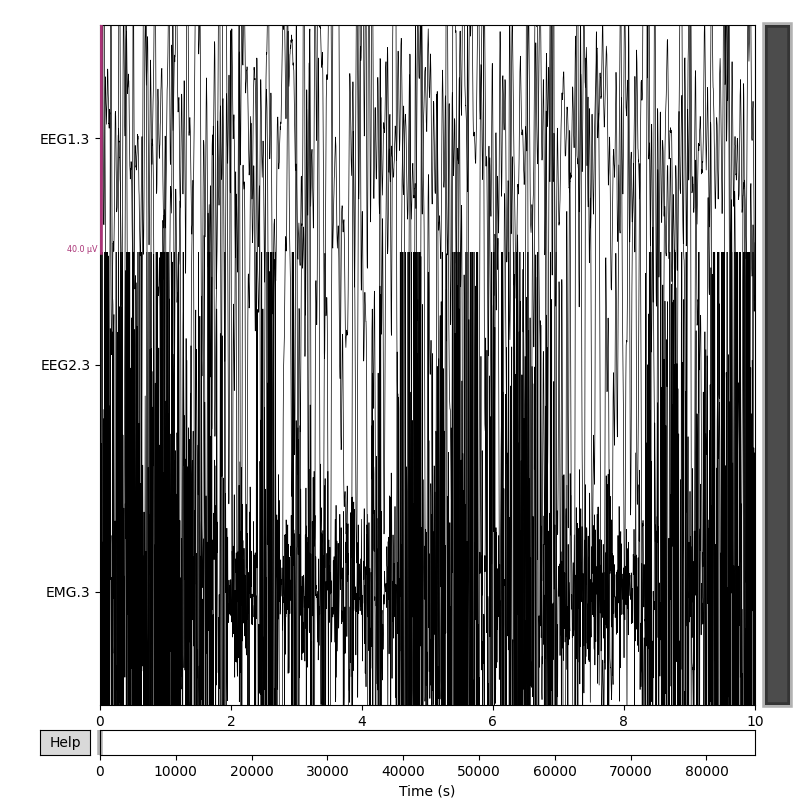

<IPython.core.display.Javascript object>


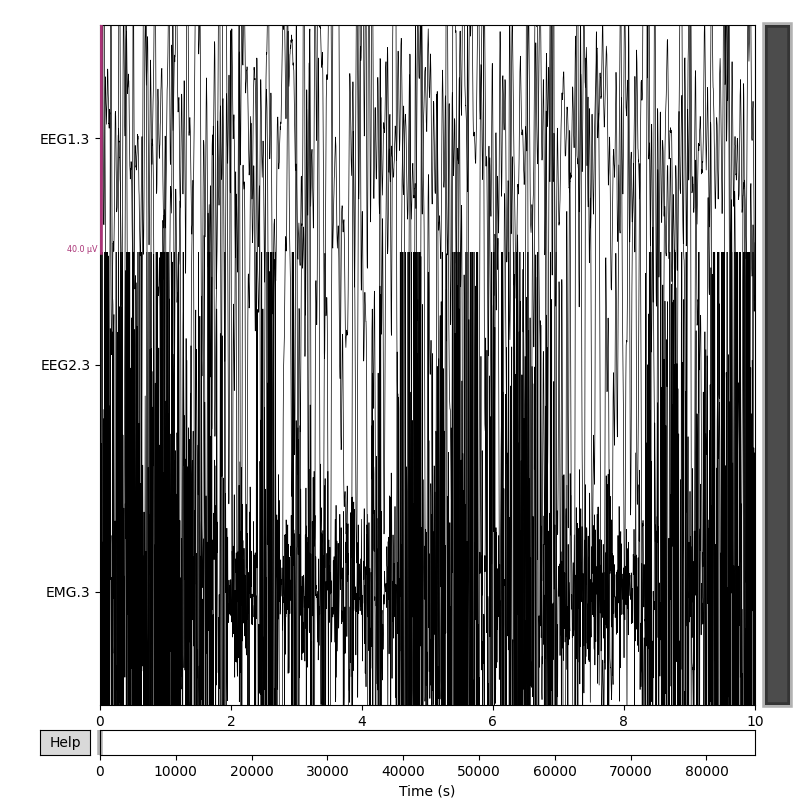

In [5]:
#raw EEG recordings
%matplotlib notebook
import mne
import matplotlib.pyplot as plt
fname='gk-0999_baseline.edf'
raw_data=mne.io.read_raw(fname)
raw_data.plot()

In [7]:
#example of raw data from the MWM experiment
df4 = pd.read_excel('Trial_1.xlsx')
df4

,Header Lines:,37,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,Experiment,Daniel-WM-CcnD2-vs-WT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,System Independent Variable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Trial name,Trial 424,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Trial ID,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arena name,Arena 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3633,211.633,119.899,5.668659,-83.159288,15.987487,2.416713,0.251052,0.320683,9.620291,1,1,0,0,0,0,-118.095112,1
3634,211.666,119.933,5.969733,-83.251282,15.801586,3.160317,0.262732,0.314815,9.444536,1,1,0,0,0,0,-116.389031,1
3635,211.699,119.966,6.267137,-83.330878,15.987487,1.301307,0.282344,0.307872,9.236239,1,1,0,0,0,0,-114.507295,1
3636,211.733,119.999,6.559105,-83.39702,14.500279,5.205228,0.248565,0.299366,8.980791,1,1,0,0,0,0,-112.412401,1


Data Description: 

["All_Data.xlsx"](https://object.cscs.ch/v1/AUTH_4791e0a3b3de43e2840fe46d9dc2b334/ext-d000040_EEG_and_MWM_CyclinD2-KO_vs_WT_pub/All_Data.xlsx) is an Excel File containing all the data necessary to reproduce the figure of the publication. The 3 page of this file is shown in the cells above. There are 4 recording days, including one baseline day and each day contains 6 training. There were 10 knock-out mice and 10 wild-type mice. 

A [Matlab script](https://object.cscs.ch/v1/AUTH_4791e0a3b3de43e2840fe46d9dc2b334/ext-d000040_EEG_and_MWM_CyclinD2-KO_vs_WT_pub/Raw_MWM_Data/Matlab_Strategy_Analyzer.m) was used by the researchers to establish the search strategy analysis. This data was then added to "All_data.xlsx". 

The EEG recordings were analyzed by one blinded author who manually scored each epoch as 'NREM', 'REM' and 'wake' states. This was performed using the researchers' own [sleep-staging software edfView v0.1.8](https://github.com/jusjusjus/edfView/tree/v0.1.8).This data was then added to "All_data.xlsx". 

Spindle and Slow Oscilllation (SO) were detected using scripts available [here](https://github.com/MedPsych/LongTermMemory_Sleep). This data was then added to "All_data.xlsx". 

Any calculation that might have been necessary to create other columns have been explained in the cell below. 

In [8]:
df['NREM %']=(df['NREM in min']/df['TST in min'])*100
df['REM %']=(df['REM in min']/df['TST in min'])*100
df['Spindle density in Spindles per min']=df['Spindle count']/df['NREM in min']
df['SO density in SOs per min']=df['SO count']/df['NREM in min']
for x in df:
    pd.options.display.float_format = '{:,.2f}'.format
    df['NREM/REM']=(df['NREM in min']/df['REM in min'])

## Boxplots

In [8]:
#class to be used for boxplots 

def boxplot(title,category,y_min, y_max,y_loc, y_loc2): 
    %matplotlib inline
    plt.figure(figsize=(3,6)) 
    #data
    WT_Data=df[df['Group']=='WT']
    KO_Data=df[df['Group']=='KO']
    w=WT_Data[WT_Data['Day']=='bl'][category]
    x=KO_Data[KO_Data['Day']=='bl'][category]
    y=mean_of_list(np.array((WT_Data[WT_Data['Day']!='bl'][category]), dtype=np.float64))
    z=mean_of_list(np.array((KO_Data[KO_Data['Day']!='bl'][category]), dtype=np.float64))
    #pvalue
    pvalue(w,x, y_loc, 1.5, 'black')
    pvalue(y,z, y_loc, 3.5, 'black')
    pvalue2(w,y, y_loc2, 2, 'red')
    pvalue2(x,z, y_loc2, 2.5, 'blue')
    #plotting
    bplot=plt.boxplot ([w, x, y, z], patch_artist=True,whis=3)
    colors = ['red', 'blue', 'red', 'blue']
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    

    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    plt.ylabel(title) 
    plt.ylim(y_min,y_max)
    plt.title('baseline                        learning', fontsize=10, y=-0.05)
    plt.show()
    
def mean_of_list(list):
    list2=[]
    i=0
    n=-1
    while i<= 9:
        a=(list[n+1]+list[(n+1)+10]+list[(n+1)+20])/3
        list2.append(a)
        i=i+1
        n=n+1
    return list2

#two-sided unpaired t-test        
def pvalue(a,b,y_loc, x_loc, colour):
    stat=stats.ttest_ind(a, b, equal_var=True)
    pvalue=stat[-1]
    if pvalue<=0.001:
         plt.text(x_loc, y_loc,'***', fontsize=10, color=colour)
    if pvalue<=0.01 and pvalue>0.001:
        plt.text(x_loc, y_loc,'**', fontsize=10, color=colour)
    if pvalue<=0.05 and pvalue>0.01:
        plt.text(x_loc, y_loc,'*', fontsize=10, color=colour)
        

#two-sided paired t-test
def pvalue2(a,b,y_loc, x_loc, colour):
    stat=stats.ttest_rel(a, b)
    pvalue=stat[-1]
    if pvalue<=0.001:
         plt.text(x_loc, y_loc,'***', fontsize=10, color=colour)
    if pvalue<=0.01 and pvalue>0.001:
        plt.text(x_loc, y_loc,'**', fontsize=10, color=colour)
    if pvalue<=0.05 and pvalue>0.01:
        plt.text(x_loc, y_loc,'*', fontsize=10, color=colour)
 



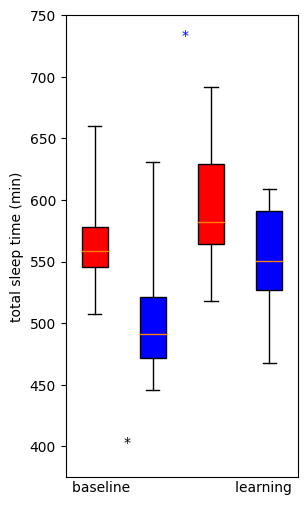

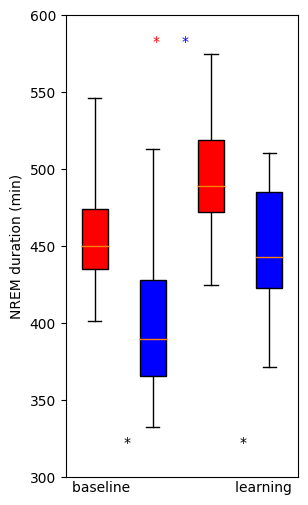

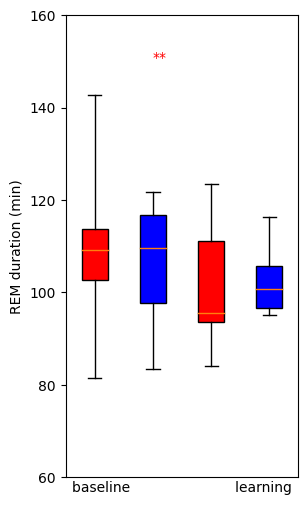

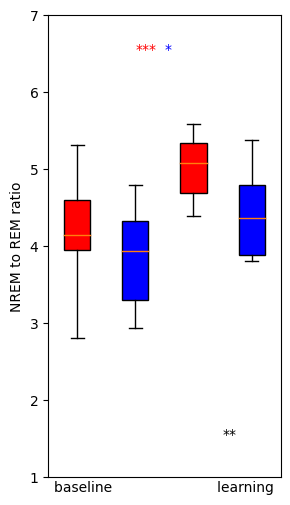

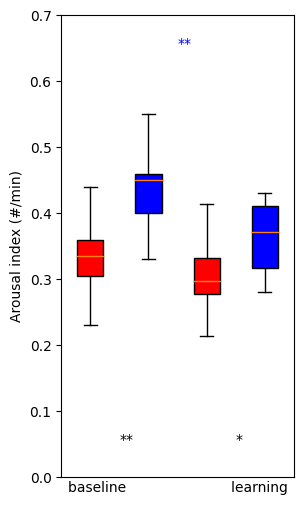

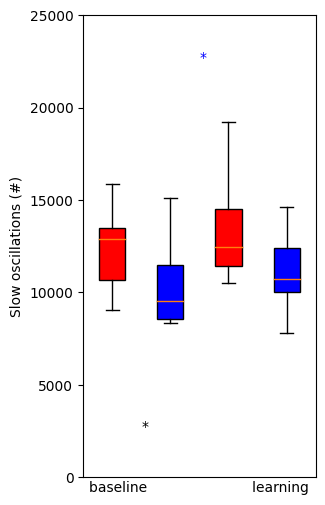

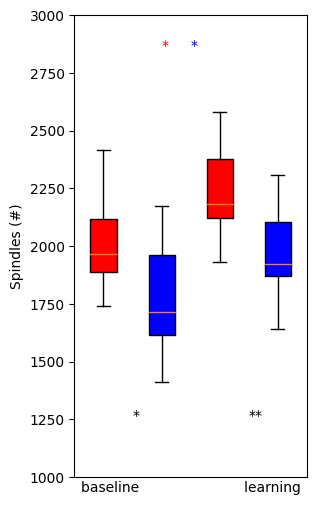

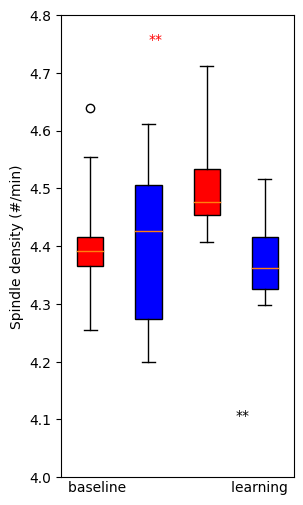

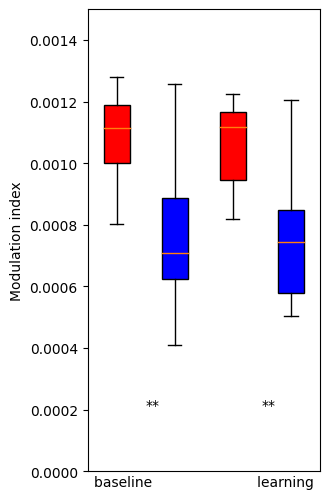

In [9]:
#plot figures

boxplot('total sleep time (min)','TST in min', 375, 750, 400, 730 )


boxplot('NREM duration (min)','NREM in min', 300, 600, 320, 580)


boxplot('REM duration (min)','REM in min', 60, 160, 60, 150)


boxplot('NREM to REM ratio','NREM/REM', 1,7, 1.5, 6.5)


boxplot('Arousal index (#/min)','Arousal index in Arousals per min', 0,0.7, 0.05, 0.65)


boxplot('Slow oscillations (#)','SO count', 0,25000, 2500, 22500)


boxplot('Spindles (#)','Spindle count', 1000,3000, 1250, 2850)


boxplot('Spindle density (#/min)','Spindle density in Spindles per min', 4,4.8, 4.1, 4.75)


boxplot('Modulation index','PAC modulation index', 0,0.0015, 0.0002, 0.0014)

## Scatter plots

In [10]:
#class to be used for scatter plots 
def scatter_plot(category1, category2, title, title2, y_min, y_max, x_min, x_max):
    WT_Data=df[df['Group']=='WT']
    KO_Data=df[df['Group']=='KO']

    WT_Data_A=mean_of_list2(np.array((WT_Data[category1]), dtype=np.float64))
    KO_Data_A=mean_of_list2(np.array((KO_Data[category1]), dtype=np.float64))
    WT_Data_S=mean_of_list2(np.array((WT_Data[category2]), dtype=np.float64))
    KO_Data_S=mean_of_list2(np.array((KO_Data[category2]), dtype=np.float64))

    Data_A=df[category1]
    Data_S=df[category2]
    ys=np.array(Data_A, dtype=np.float64)
    xs=np.array(Data_S, dtype=np.float64)

    def best_fit_slope_and_intercept (xs,xy):
        m= ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs)-mean(xs*xs)))    
        b = mean(ys)-m*mean(xs)
        return m, b
    m,b=best_fit_slope_and_intercept(xs,ys)
    regression_line=[(m*x)+b for x in xs]
    plt.figure(figsize=(3,4)) 
    plt.scatter(WT_Data_S,WT_Data_A, color='red', marker=",", s=20)
    plt.scatter(KO_Data_S,KO_Data_A, color='blue', marker=".", s=30)
    plt.ylabel(title)
    plt.xlabel(title2)
    #plt.ylim(y_min,y_max)
    #plt.xlim(x_min, x_max)
    plt.plot(xs,regression_line, color='black')
    plt.grid()
    plt.show()
    
    
def mean_of_list2(list): 
    list2=[]
    i=0
    n=-1
    while i<= 9:
        a=(list[n+1]+list[(n+1)+10]+list[(n+1)+20]+list[(n+1)+30])/4
        list2.append(a)
        i=i+1
        n=n+1
    return list2

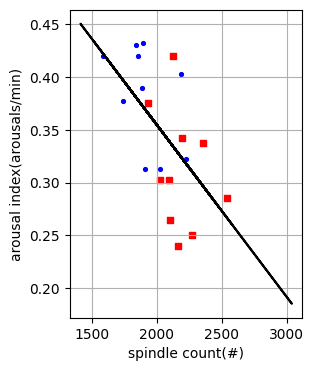

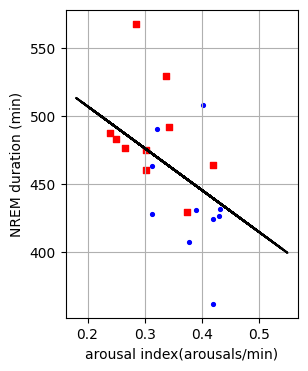

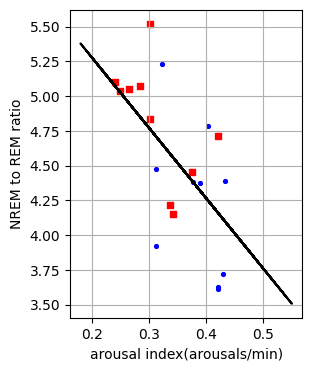

In [11]:
#plot figures
scatter_plot('Arousal index in Arousals per min','Spindle count','arousal index(arousals/min)', 'spindle count(#)', 0,0.5, 1500, 3000)
scatter_plot('NREM in min','Arousal index in Arousals per min', 'NREM duration (min)','arousal index(arousals/min)', 350,600,0,0.5)
scatter_plot('NREM/REM','Arousal index in Arousals per min', 'NREM to REM ratio', 'arousal index(arousals/min)',3.5,6,0,0.5)

## Other Scatter plots

In [14]:
def data_import(sheetname,columnname):
    list=[]
    from openpyxl import Workbook, load_workbook
    wb = load_workbook("All_Data.xlsx")
    source = wb[sheetname]
    for cell in source[columnname]:
        list.append(cell.value)
    return list
   
def mean_of_list2(list): 
    list2=[]
    i=0
    n=-1
    while i<= 9:
        a=(list[n+1]+list[(n+1)+10]+list[(n+1)+20]+list[(n+1)+30])/4
        list2.append(a)
        i=i+1
        n=n+1
    return list2

def best_fit_slope_and_intercept (xs,xy):
    m= ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs)-mean(xs*xs)))    
    b = mean(ys)-m*mean(xs)
    return m, b

def mean_of_list3(list): 
    list2=[]
    i=0
    n=-1
    while i<= 9:
        a=(list[(n+1)+10]+list[(n+1)+20]+list[(n+1)+30])/3
        list2.append(a)
        i=i+1
        n=n+1
    return list2


WT_Data=df[df['Group']=='WT']
KO_Data=df[df['Group']=='KO']

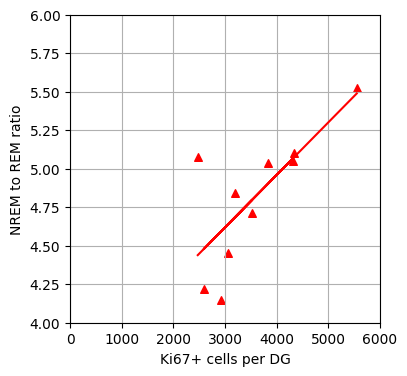

In [15]:
a=data_import("Ki67",'C')
a.pop(0)
Ki67_cells=a[10:20]
Ki67_cells
NREM_REM=mean_of_list2(np.array((WT_Data['NREM/REM']), dtype=np.float64))

ys=np.array(NREM_REM, dtype=np.float64)
xs=np.array(Ki67_cells, dtype=np.float64)

%matplotlib inline
plt.figure(figsize=(4,4)) 
m,b=best_fit_slope_and_intercept(xs,ys)
regression_line=[(m*x)+b for x in xs]
plt.scatter(Ki67_cells,NREM_REM, color='red', marker="^", s=30) 

plt.ylabel('NREM to REM ratio')
plt.xlabel('Ki67+ cells per DG' )
plt.ylim(4,6)
plt.xlim(0,6000)
plt.plot(xs,regression_line, color='red')
plt.grid()
plt.show()



<Figure size 150x200 with 0 Axes>

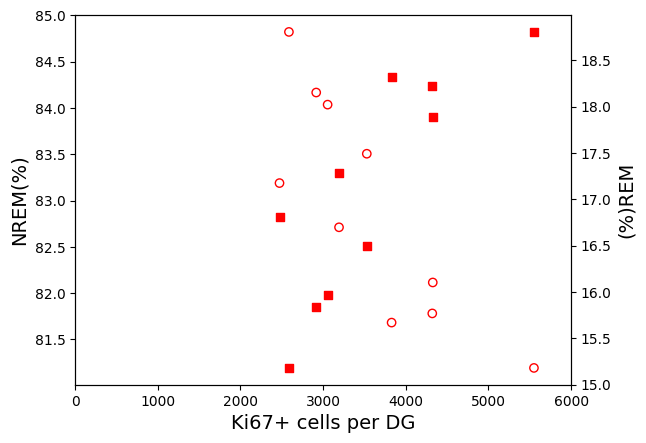

In [25]:
plt.figure(figsize=(2,2
                   ))
NREM=mean_of_list3(np.array((WT_Data['NREM %']), dtype=np.float64))
Ki67_cells
REM=mean_of_list3(np.array((WT_Data['REM %']), dtype=np.float64))

ys1=np.array(NREM, dtype=np.float64)
xy1=np.array(Ki67_cells, dtype=np.float64)


%matplotlib inline
plt.figure(figsize=(1.5,2)) 
fig,ax = plt.subplots()
ax.scatter(Ki67_cells,
        NREM,
        color="red", 
        marker=",")
ax.set_xlabel('Ki67+ cells per DG', fontsize = 14)
ax.set_ylabel("NREM(%)",
              color="black",
              fontsize=14)
m,b=best_fit_slope_and_intercept(ys1,xy1)
regression_line1=[(m*x)+b for x in xy1]
#plt.plot(xs,regression_line1, color='red')

ax2=ax.twinx()
ax2.scatter(Ki67_cells, REM, facecolors='none', edgecolors='r')
ax2.set_ylabel("(%)REM",color="black",fontsize=14)

def best_fit_slope_and_intercept (xs,xy):
        m= ((mean(xs)*mean(ys))-mean(xs*ys))/((mean(xs)*mean(xs)-mean(xs*xs)))    
        b = mean(ys)-m*mean(xs)
        return m,b

    
ys2=np.array(REM, dtype=np.float64)
xy2=np.array(Ki67_cells, dtype=np.float64)
m,b=best_fit_slope_and_intercept(ys2,xy2)
regression_line2=[(m*x)+b for x in xy2]
#plt.plot(xs,regression_line2, color='red')





plt.xlim(0,6000)

plt.show()



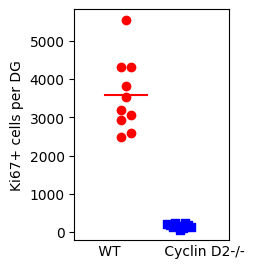

In [17]:
list=[]
from openpyxl import Workbook, load_workbook
wb = load_workbook("All_Data.xlsx")
source = wb["Ki67"]
for cell in source['C']:
    list.append(cell.value)
KO_Ki67=list[1:11]
WT_Ki67=list[11:21]
y=[mean(WT_Ki67),mean(WT_Ki67)]
x=[0.6,1.4]

KO_x=[2,2.05,2.1,2.15,1.95,1.9,1.85,2.2,1.8,2.25]

WT_x=[0.9,0.9,0.9,1.1,1,0.9,1.1,1,1.1,1]
%matplotlib inline
plt.figure(figsize=(2,3)) 
plt.scatter(WT_x,WT_Ki67, color='red')
plt.scatter(KO_x,KO_Ki67, color='blue', marker=",")
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.xlim(0,3)
plt.ylabel('Ki67+ cells per DG') 
plt.plot(x,y, color='red')
plt.title('         WT          Cyclin D2-/-',y=-0.1, size=10)
plt.show()




## Other boxplots

In [18]:
#data of route efficiency, there are 6 trials per day for each mouse and there are 3 days 
list=(data_import('MWM','E'))
len(list)
df=list[1:361]



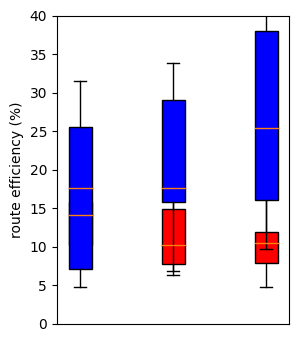

In [19]:

def mean_of_list4(list_og,list_name):
    i=0
    n=-1
    while i<= 9:
        a=(list_og[(n+1)]+list_og[(n+2)]+list_og[(n+3)]+list_og[(n+4)]+list_og[(n+5)]+list_og[(n+6)])/6
        list_name.append(a)
        i=i+1
        n=n+6
    return (list_name)


day1_WT_RE=df[0:60]
day1_WT_RE_mean=[]
mean_of_list4(day1_WT_RE,day1_WT_RE_mean)
day2_WT_RE=df[60:120]
day2_WT_RE_mean=[]
mean_of_list4(day2_WT_RE,day2_WT_RE_mean)
day3_WT_RE=df[120:180]
day3_WT_RE_mean=[]
mean_of_list4(day3_WT_RE,day3_WT_RE_mean)
day1_KO_RE=df[180:240]
day1_KO_RE_mean=[]
mean_of_list4(day1_KO_RE,day1_KO_RE_mean)
day2_KO_RE=df[240:300]
day2_KO_RE_mean=[]
mean_of_list4(day2_KO_RE,day2_KO_RE_mean)
day3_KO_RE=df[300:360]
day3_KO_RE_mean=[]
mean_of_list4(day3_KO_RE,day3_KO_RE_mean)

%matplotlib inline
plt.figure(figsize=(3,4)) 
bplot1=plt.boxplot ([day1_WT_RE_mean, day2_WT_RE_mean, day3_WT_RE_mean], patch_artist=True,whis=3, positions=[2,4,6])
colors = ['red', 'red', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2=plt.boxplot ([day1_KO_RE_mean, day2_KO_RE_mean, day3_KO_RE_mean], patch_artist=True,whis=3,positions=[2,4,6])
colors = ['blue', 'blue', 'blue']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)
 

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('route efficiency (%)') 
plt.ylim(0,40)

 
plt.show()





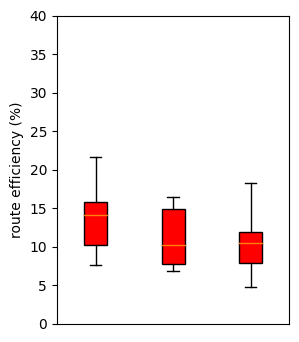

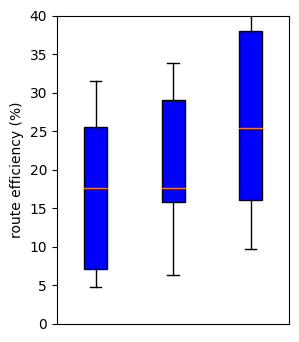

In [20]:
%matplotlib inline
plt.figure(figsize=(3,4)) 

bplot1=plt.boxplot ([day1_WT_RE_mean, day2_WT_RE_mean, day3_WT_RE_mean], patch_artist=True,whis=3)
colors = ['red', 'red', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('route efficiency (%)') 
plt.ylim(0,40)

plt.show()

%matplotlib inline
plt.figure(figsize=(3,4)) 

bplot2=plt.boxplot ([day1_KO_RE_mean, day2_KO_RE_mean, day3_KO_RE_mean], patch_artist=True,whis=3)
colors = ['blue', 'blue', 'blue']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)
    

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('route efficiency (%)') 
plt.ylim(0,40)
plt.show()

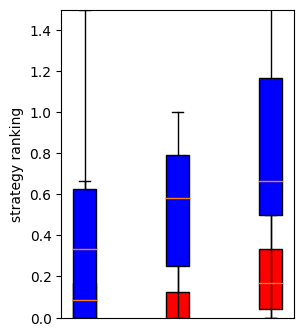

In [21]:
list=(data_import('MWM','F'))

len(list)
df=list[1:361]






day1_WT_SR=df[0:60]
day1_WT_SR_mean=[]
mean_of_list4(day1_WT_SR,day1_WT_SR_mean)
day2_WT_SR=df[60:120]
day2_WT_SR_mean=[]
mean_of_list4(day2_WT_SR,day2_WT_SR_mean)
day3_WT_SR=df[120:180]
day3_WT_SR_mean=[]
mean_of_list4(day3_WT_SR,day3_WT_SR_mean)
day1_KO_SR=df[180:240]
day1_KO_SR_mean=[]
mean_of_list4(day1_KO_SR,day1_KO_SR_mean)
day2_KO_SR=df[240:300]
day2_KO_SR_mean=[]
mean_of_list4(day2_KO_SR,day2_KO_SR_mean)
day3_KO_SR=df[300:360]
day3_KO_SR_mean=[]
mean_of_list4(day3_KO_SR,day3_KO_SR_mean)

%matplotlib inline
plt.figure(figsize=(3,4)) 

bplot1=plt.boxplot ([day1_WT_SR_mean, day2_WT_SR_mean, day3_WT_SR_mean], patch_artist=True,whis=3, positions=[2,4,6])
colors = ['red', 'red', 'red']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)

bplot2=plt.boxplot ([day1_KO_SR_mean, day2_KO_SR_mean, day3_KO_SR_mean], patch_artist=True,whis=3,positions=[2,4,6])
colors = ['blue', 'blue', 'blue']
for patch, color in zip(bplot2['boxes'], colors):
    patch.set_facecolor(color)
 

        
frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('strategy ranking') 
plt.ylim(0,1.5)

plt.show()




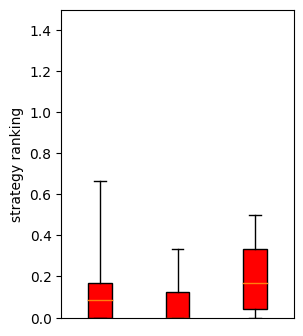

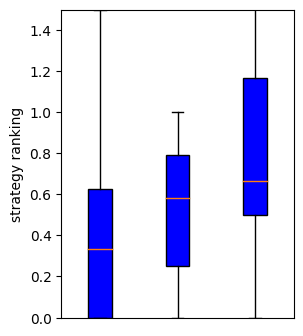

In [22]:
%matplotlib inline
plt.figure(figsize=(3,4)) 

bplot=plt.boxplot ([day1_WT_SR_mean, day2_WT_SR_mean, day3_WT_SR_mean], patch_artist=True,whis=3)
colors = ['red', 'red', 'red']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('strategy ranking') 
plt.ylim(0,1.5)

plt.show()

%matplotlib inline
plt.figure(figsize=(3,4)) 
bplot=plt.boxplot ([day1_KO_SR_mean, day2_KO_SR_mean, day3_KO_SR_mean], patch_artist=True,whis=3)
colors = ['blue', 'blue', 'blue']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
    

frame1 = plt.gca()
frame1.axes.get_xaxis().set_visible(False)
plt.ylabel('strategy ranking') 
plt.ylim(0,1.5)
plt.show()